In [1]:
import os
import pandas as pd
from rdkit import Chem

import stylia as st
from stylia import (
    ONE_COLUMN_WIDTH,
    TWO_COLUMNS_WIDTH,
    NamedColorMaps,
    NamedColors,
    ContinuousColorMap,
)

data_dir = "../data/"


def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "processed","all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir,"ersilia-models", "all_smiles_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)


df = pd.read_csv(os.path.join(data_dir,"processed", "all_molecules.csv"))
colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")



# Negative Data: InertDB

InertDB is  completely inert subset of ChEMBL

In [ ]:
#Do not run again
inertdb = os.path.join(data_dir, "inertdb", "inertdb_cic_v2024.03.smi")
inertdb_smi= []
with open(inertdb, 'r') as file:
    for line in file:
        inertdb_smi.append(line.strip())
print(len(inertdb_smi))
inertdb = pd.DataFrame(inertdb_smi, columns=["SMILES"])
inertdb.to_csv(os.path.join(data_dir, "inertdb", "inertdb.csv"), index=False)

3205


/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/gturon/miniconda3/envs/chem/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finit

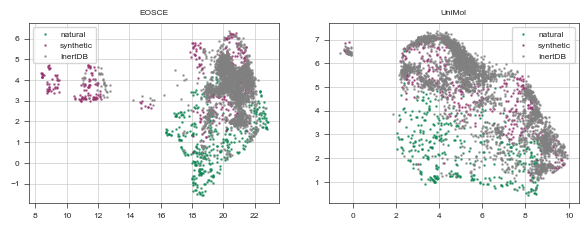

In [13]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
inertdb = pd.read_csv(os.path.join(data_dir, "inertdb", "inertdb_eos2gw4.csv"))
inertdb = inertdb.dropna()
inertdb_descs=inertdb.iloc[:,2:]
inertdb_array = inertdb_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
inertdb_umap = umap_trn.transform(inertdb_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(inertdb_umap)[0],
    np.transpose(inertdb_umap)[1],
    alpha=0.7,
    label="InertDB",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
inertdb = pd.read_csv(os.path.join(data_dir, "inertdb", "inertdb_eos39co.csv"))
inertdb = inertdb.dropna()
inertdb_descs=inertdb.iloc[:,2:]
inertdb_array = inertdb_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
inertdb_umap = umap_trn.transform(inertdb_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(inertdb_umap)[0],
    np.transpose(inertdb_umap)[1],
    alpha=0.7,
    label="InertDB",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

# Negative Data: ChEMBL

Randomly sample a subset of 3000 molecules from ChEMBL35

In [ ]:
#Do not run again
df = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_35_chemreps.txt"), delimiter='\t') 
sampled_df = df[['canonical_smiles']].sample(n=3000, random_state=24)
print(sampled_df.shape)
all_smi = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
sampled_df = sampled_df[~sampled_df['canonical_smiles'].isin(all_smi['canonical_smiles'])]
print(sampled_df.shape)
sampled_df.to_csv(os.path.join(data_dir,"chembl",'chembl_smi.csv'), index=False)

(3000, 1)
(3000, 1)


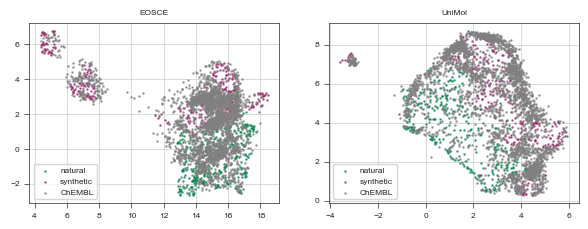

In [26]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi_eos2gw4.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi_eos39co.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

# Negative Data: COCONUT
Natural product database randomly sampled to obtain 3000 molecules

In [32]:
# do not run again
df = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_csv_lite-04-2025.csv"))
sampled_df = df[['canonical_smiles']].sample(n=3000, random_state=24)
print(sampled_df.shape)
all_smi = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
sampled_df = sampled_df[~sampled_df['canonical_smiles'].isin(all_smi['canonical_smiles'])]
print(sampled_df.shape)
sampled_df.to_csv(os.path.join(data_dir,"coconut",'coconut_smi.csv'), index=False)

/tmp/ipykernel_11847/310692272.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_csv_lite-04-2025.csv"))


(3000, 1)
(3000, 1)


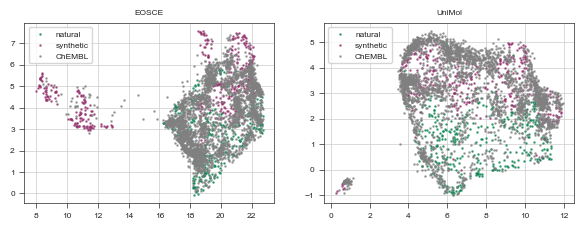

In [ ]:
import umap
import numpy as np

fig, axs = st.create_figure(
    1, 2, width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi_eos2gw4.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
neg = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi_eos39co.csv"))
neg = neg.dropna()
neg_descs=neg.iloc[:,2:]
neg_array = neg_descs.values
descs_nat = df[df["category"] == "natural"].iloc[:, 4:]
descs_syn = df[df["category"] == "synthetic"].iloc[:, 4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
neg_umap = umap_trn.transform(neg_array)
ax.scatter(
    np.transpose(np_umap)[0],
    np.transpose(np_umap)[1],
    alpha=0.7,
    label="natural",
    color=npc,
    s=0.7,
)
ax.scatter(
    np.transpose(syn_umap)[0],
    np.transpose(syn_umap)[1],
    alpha=0.7,
    label="synthetic",
    color=spc,
    s=0.7,
)
ax.scatter(
    np.transpose(neg_umap)[0],
    np.transpose(neg_umap)[1],
    alpha=0.7,
    label="ChEMBL",
    color="gray",
    s=0.7,
)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

# Train Models

In [28]:
import collections
import lazyqsar as lq
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import json
import numpy as np
import random

TIME_BUDGET_SEC = 60
ESTIMATOR_LIST = ["rf", "lgbm"]
REDUCED = False
N_FOLDS = 5
model_dir = "../models"


def cross_validate(smiles_list, y, name):

    cross_validation_data = collections.defaultdict(list)

    for _ in tqdm(range(N_FOLDS)):
        smiles_train, smiles_test, y_train, y_test = train_test_split(
            smiles_list,y, test_size=0.2, stratify=y
        )

        model = lq.MorganBinaryClassifier(
            reduced=REDUCED, time_budget_sec=TIME_BUDGET_SEC, estimator_list=ESTIMATOR_LIST
        )
        model.fit(smiles_train, y_train)

        y_pred = model.predict_proba(smiles_test)[:, 1]

        fpr, tpr, thr = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        J = tpr - fpr

        best_thr_index = np.argmax(J)
        best_thr = thr[best_thr_index]

        cross_validation_data["roc_auc"] += [roc_auc]
        cross_validation_data["thr"] += [best_thr]
        cross_validation_data["y_hat"] += [list(y_pred)]
        cross_validation_data["y"] += [list(y_test)]

    with open(
        os.path.join(model_dir, f"{name}.json"),
        "w",
    ) as f:
        json.dump(cross_validation_data, f, indent=4)

## NP product model

In [ ]:
%%capture
pos = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
pos = pos[pos["category"] == "natural"]
neg = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi.csv"))
pos["activity"] = 1
neg["activity"] = 0
pos = pos[["canonical_smiles", "activity"]]
neg = neg[["canonical_smiles", "activity"]]

all = pd.concat([pos, neg], axis=0)
print(all.shape)
all.head()
cross_validate(all["canonical_smiles"].tolist(), all["activity"].tolist(), "np_only")

(3394, 2)


  0%|          | 0/5 [00:00<?, ?it/s]

[flaml.automl.logger: 04-28 11:26:04] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 11:26:04] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 11:26:04] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 11:26:04] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 11:26:04] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 11:26:04] {2393} INFO - Estimated sufficient time budget=439s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 11:26:04] {2442} INFO -  at 0.1s,	estimator rf's best error=0.3350,	best estimator rf's best error=0.3350
[flaml.automl.logger: 04-28 11:26:04] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 11:26:05] {2442} INFO -  at 1.2s,	estimator lgbm's best error=0.2883,	best estimator lgbm's best error=0.2883
[flaml.automl.logger: 04-28 11:26:05] {2258} INFO - iteration 2, current learner rf
[flam

 20%|██        | 1/5 [01:51<07:25, 111.48s/it]

[flaml.automl.logger: 04-28 11:27:56] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 11:27:56] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 11:27:56] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 11:27:56] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 11:27:56] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 11:27:56] {2393} INFO - Estimated sufficient time budget=434s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 11:27:56] {2442} INFO -  at 0.1s,	estimator rf's best error=0.3188,	best estimator rf's best error=0.3188
[flaml.automl.logger: 04-28 11:27:56] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 11:27:57] {2442} INFO -  at 1.2s,	estimator lgbm's best error=0.2497,	best estimator lgbm's best error=0.2497
[flaml.automl.logger: 04-28 11:27:57] {2258} INFO - iteration 2, current learner rf
[flam

 40%|████      | 2/5 [02:55<04:10, 83.45s/it] 

[flaml.automl.logger: 04-28 11:29:00] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 11:29:00] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 11:29:00] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 11:29:00] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 11:29:00] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 11:29:00] {2393} INFO - Estimated sufficient time budget=335s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 11:29:00] {2442} INFO -  at 0.1s,	estimator rf's best error=0.2982,	best estimator rf's best error=0.2982
[flaml.automl.logger: 04-28 11:29:00] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 11:29:04] {2442} INFO -  at 4.9s,	estimator lgbm's best error=0.2512,	best estimator lgbm's best error=0.2512
[flaml.automl.logger: 04-28 11:29:04] {2258} INFO - iteration 2, current learner rf
[flam

 60%|██████    | 3/5 [04:23<02:51, 85.71s/it]

[flaml.automl.logger: 04-28 11:30:28] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 11:30:28] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 11:30:28] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 11:30:28] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 11:30:28] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 11:30:28] {2393} INFO - Estimated sufficient time budget=348s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 11:30:28] {2442} INFO -  at 0.1s,	estimator rf's best error=0.3321,	best estimator rf's best error=0.3321
[flaml.automl.logger: 04-28 11:30:28] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 11:30:31] {2442} INFO -  at 2.6s,	estimator lgbm's best error=0.2215,	best estimator lgbm's best error=0.2215
[flaml.automl.logger: 04-28 11:30:31] {2258} INFO - iteration 2, current learner rf
[flam

 80%|████████  | 4/5 [05:35<01:20, 80.04s/it]

[flaml.automl.logger: 04-28 11:31:39] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 11:31:39] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 11:31:39] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 11:31:39] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 11:31:39] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 11:31:39] {2393} INFO - Estimated sufficient time budget=375s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 11:31:39] {2442} INFO -  at 0.1s,	estimator rf's best error=0.2830,	best estimator rf's best error=0.2830
[flaml.automl.logger: 04-28 11:31:39] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 11:31:45] {2442} INFO -  at 5.7s,	estimator lgbm's best error=0.2599,	best estimator lgbm's best error=0.2599
[flaml.automl.logger: 04-28 11:31:45] {2258} INFO - iteration 2, current learner rf
[flam

100%|██████████| 5/5 [06:50<00:00, 82.02s/it]


## Synthetic model: Chembl

In [ ]:
%%capture

pos = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
pos = pos[pos["category"] == "synthetic"]
neg = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi.csv"))
pos["activity"] = 1
neg["activity"] = 0
pos = pos[["canonical_smiles", "activity"]]
neg = neg[["canonical_smiles", "activity"]]

all = pd.concat([pos, neg], axis=0)
print(all.shape)
all.head()
cross_validate(all["canonical_smiles"].tolist(), all["activity"].tolist(), "sd_chembl")

(3813, 2)


  0%|          | 0/5 [00:00<?, ?it/s]

[flaml.automl.logger: 04-28 09:08:58] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:08:58] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:08:58] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:08:58] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:08:58] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:08:58] {2393} INFO - Estimated sufficient time budget=345s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 09:08:58] {2442} INFO -  at 0.1s,	estimator rf's best error=0.2514,	best estimator rf's best error=0.2514
[flaml.automl.logger: 04-28 09:08:58] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:08:58] {2442} INFO -  at 0.4s,	estimator lgbm's best error=0.1639,	best estimator lgbm's best error=0.1639
[flaml.automl.logger: 04-28 09:08:58] {2258} INFO - iteration 2, current learner rf
[flam

 20%|██        | 1/5 [01:07<04:30, 67.55s/it]

[flaml.automl.logger: 04-28 09:10:05] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:10:05] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:10:05] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:10:05] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:10:05] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:10:05] {2393} INFO - Estimated sufficient time budget=346s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 09:10:05] {2442} INFO -  at 0.1s,	estimator rf's best error=0.2335,	best estimator rf's best error=0.2335
[flaml.automl.logger: 04-28 09:10:05] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:10:06] {2442} INFO -  at 0.9s,	estimator lgbm's best error=0.2586,	best estimator rf's best error=0.2335
[flaml.automl.logger: 04-28 09:10:06] {2258} INFO - iteration 2, current learner rf
[flaml.

 40%|████      | 2/5 [02:08<03:11, 63.89s/it]

[flaml.automl.logger: 04-28 09:11:06] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:11:06] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:11:06] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:11:06] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:11:06] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:11:06] {2393} INFO - Estimated sufficient time budget=413s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 09:11:06] {2442} INFO -  at 0.1s,	estimator rf's best error=0.2763,	best estimator rf's best error=0.2763
[flaml.automl.logger: 04-28 09:11:06] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:11:07] {2442} INFO -  at 0.5s,	estimator lgbm's best error=0.2499,	best estimator lgbm's best error=0.2499
[flaml.automl.logger: 04-28 09:11:07] {2258} INFO - iteration 2, current learner rf
[flam

 60%|██████    | 3/5 [03:12<02:07, 63.87s/it]

[flaml.automl.logger: 04-28 09:12:10] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:12:10] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:12:10] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:12:10] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:12:10] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:12:10] {2393} INFO - Estimated sufficient time budget=428s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 09:12:10] {2442} INFO -  at 0.1s,	estimator rf's best error=0.2147,	best estimator rf's best error=0.2147
[flaml.automl.logger: 04-28 09:12:10] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:12:11] {2442} INFO -  at 0.6s,	estimator lgbm's best error=0.1609,	best estimator lgbm's best error=0.1609
[flaml.automl.logger: 04-28 09:12:11] {2258} INFO - iteration 2, current learner rf
[flam

 80%|████████  | 4/5 [04:14<01:02, 62.91s/it]

[flaml.automl.logger: 04-28 09:13:12] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:13:12] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:13:12] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:13:12] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:13:12] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:13:12] {2393} INFO - Estimated sufficient time budget=681s. Estimated necessary time budget=1s.
[flaml.automl.logger: 04-28 09:13:12] {2442} INFO -  at 0.1s,	estimator rf's best error=0.2194,	best estimator rf's best error=0.2194
[flaml.automl.logger: 04-28 09:13:12] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:13:13] {2442} INFO -  at 1.3s,	estimator lgbm's best error=0.1509,	best estimator lgbm's best error=0.1509
[flaml.automl.logger: 04-28 09:13:13] {2258} INFO - iteration 2, current learner rf
[flam

100%|██████████| 5/5 [05:17<00:00, 63.59s/it]


In [ ]:
%%capture
pos = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
pos = pos[pos["category"] == "synthetic"]
neg = pd.read_csv(os.path.join(data_dir, "inertdb", "inertdb.csv"))
neg = neg.rename(columns={"SMILES": "canonical_smiles"})
pos["activity"] = 1
neg["activity"] = 0
pos = pos[["canonical_smiles", "activity"]]
neg = neg[["canonical_smiles", "activity"]]

all = pd.concat([pos, neg], axis=0)
print(all.shape)
cross_validate(all["canonical_smiles"].tolist(), all["activity"].tolist(), "sd_inertdb")

(4018, 2)


  0%|          | 0/5 [00:00<?, ?it/s]

[flaml.automl.logger: 04-28 08:59:59] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 08:59:59] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 08:59:59] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 08:59:59] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 08:59:59] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 08:59:59] {2393} INFO - Estimated sufficient time budget=435s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 08:59:59] {2442} INFO -  at 0.1s,	estimator rf's best error=0.0746,	best estimator rf's best error=0.0746
[flaml.automl.logger: 04-28 08:59:59] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:00:01] {2442} INFO -  at 1.3s,	estimator lgbm's best error=0.0850,	best estimator rf's best error=0.0746
[flaml.automl.logger: 04-28 09:00:01] {2258} INFO - iteration 2, current learner rf
[flaml.

 20%|██        | 1/5 [01:03<04:14, 63.60s/it]

[flaml.automl.logger: 04-28 09:01:03] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:01:03] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:01:03] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:01:03] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:01:03] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:01:03] {2393} INFO - Estimated sufficient time budget=356s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 09:01:03] {2442} INFO -  at 0.1s,	estimator rf's best error=0.1215,	best estimator rf's best error=0.1215
[flaml.automl.logger: 04-28 09:01:03] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:01:03] {2442} INFO -  at 0.5s,	estimator lgbm's best error=0.0677,	best estimator lgbm's best error=0.0677
[flaml.automl.logger: 04-28 09:01:03] {2258} INFO - iteration 2, current learner rf
[flam

 40%|████      | 2/5 [02:05<03:07, 62.53s/it]

[flaml.automl.logger: 04-28 09:02:05] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:02:05] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:02:05] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:02:05] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:02:05] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:02:05] {2393} INFO - Estimated sufficient time budget=494s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 09:02:05] {2442} INFO -  at 0.1s,	estimator rf's best error=0.1295,	best estimator rf's best error=0.1295
[flaml.automl.logger: 04-28 09:02:05] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:02:05] {2442} INFO -  at 0.6s,	estimator lgbm's best error=0.0904,	best estimator lgbm's best error=0.0904
[flaml.automl.logger: 04-28 09:02:05] {2258} INFO - iteration 2, current learner rf
[flam

 60%|██████    | 3/5 [03:06<02:03, 61.88s/it]

[flaml.automl.logger: 04-28 09:03:06] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:03:06] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:03:06] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:03:06] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:03:06] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:03:06] {2393} INFO - Estimated sufficient time budget=377s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 09:03:06] {2442} INFO -  at 0.1s,	estimator rf's best error=0.1317,	best estimator rf's best error=0.1317
[flaml.automl.logger: 04-28 09:03:06] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:03:07] {2442} INFO -  at 1.3s,	estimator lgbm's best error=0.0865,	best estimator lgbm's best error=0.0865
[flaml.automl.logger: 04-28 09:03:07] {2258} INFO - iteration 2, current learner rf
[flam

 80%|████████  | 4/5 [04:10<01:02, 62.75s/it]

[flaml.automl.logger: 04-28 09:04:10] {1728} INFO - task = classification
[flaml.automl.logger: 04-28 09:04:10] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-28 09:04:10] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-28 09:04:10] {1955} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm']
[flaml.automl.logger: 04-28 09:04:10] {2258} INFO - iteration 0, current learner rf
[flaml.automl.logger: 04-28 09:04:10] {2393} INFO - Estimated sufficient time budget=363s. Estimated necessary time budget=0s.
[flaml.automl.logger: 04-28 09:04:10] {2442} INFO -  at 0.1s,	estimator rf's best error=0.1495,	best estimator rf's best error=0.1495
[flaml.automl.logger: 04-28 09:04:10] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-28 09:04:11] {2442} INFO -  at 1.2s,	estimator lgbm's best error=0.1379,	best estimator lgbm's best error=0.1379
[flaml.automl.logger: 04-28 09:04:11] {2258} INFO - iteration 2, current learner rf
[flam

100%|██████████| 5/5 [05:13<00:00, 62.71s/it]


## All with mixed negs

In [ ]:
%%capture
pos = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
neg_sd = pd.read_csv(os.path.join(data_dir, "chembl", "chembl_smi.csv"))
neg_sd = neg_sd.sample(frac=0.5, random_state=42)
neg_np = pd.read_csv(os.path.join(data_dir, "coconut", "coconut_smi.csv"))
neg_np = neg_np.sample(frac=0.5, random_state=42)
neg = pd.concat([neg_sd, neg_np], axis=0)
pos["activity"] = 1
neg["activity"] = 0
pos = pos[["canonical_smiles", "activity"]]
neg = neg[["canonical_smiles", "activity"]]

all = pd.concat([pos, neg], axis=0)
print(all.shape)
cross_validate(all["canonical_smiles"].tolist(), all["activity"].tolist(), "sd_and_np")

# Model Performances

In [31]:
def plot_roc_curve(ax, name):
    with open(os.path.join(model_dir, f"{name}.json"), 'r') as f:
        results = json.load(f)

    y_hats = results['y_hat']
    y_trues = results['y']

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for y_true, y_hat in zip(y_trues, y_hats):
        y_true = np.array(y_true)
        y_hat = np.array(y_hat)

        fpr, tpr, _ = roc_curve(y_true, y_hat)
        roc_auc = auc(fpr, tpr)

        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs.append(tpr_interp)
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    std_tpr = np.std(tprs, axis=0)

    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = {:.2f} $\pm$ {:.2f})'.format(mean_auc, std_auc),
            lw=1, alpha=1)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray')
    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tpr_lower, tpr_upper, color='gray', alpha=0.5,
                    label=r'$\pm$ 1 std. dev.')
    ax.set_title(f"AUROC {name}")
    ax.set_xlabel("")
    ax.set_ylabel("")
    

In [ ]:
names = ["np_only", "sd_chembl", "sd_inertdb", "sd_and_np"]
fig, axs = st.create_figure(
    1, len(names), width=TWO_COLUMNS_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

for n in names:
    ax = axs.next()
    plot_roc_curve(ax, n)

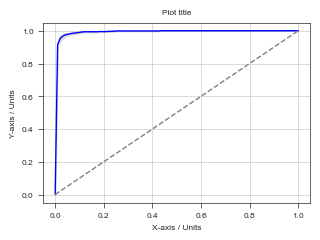

In [17]:
with open(os.path.join(model_dir, "inertdb.json"), 'r') as f:
    results = json.load(f)

rocaucs = results['roc_auc']
thresholds = results['thr']
y_hats = results['y_hat']
y_trues = results['y']

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)  # 100 points for smooth average

# Loop through each fold
for y_true, y_hat in zip(y_trues, y_hats):
    y_true = np.array(y_true)
    y_hat = np.array(y_hat)

    fpr, tpr, _ = roc_curve(y_true, y_hat)
    roc_auc = auc(fpr, tpr)

    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)
    aucs.append(roc_auc)

mean_tpr = np.mean(tprs, axis=0)
std_tpr = np.std(tprs, axis=0)

mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

fig, axs = st.create_figure(
    1, 1, width=ONE_COLUMN_WIDTH, height=0.33 * TWO_COLUMNS_WIDTH
)

ax = axs.next()

ax.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = {:.2f} $\pm$ {:.2f})'.format(mean_auc, std_auc),
         lw=1, alpha=1)

# Plot shaded area for +- std
tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tpr_lower, tpr_upper, color='gray', alpha=0.2,
                 label=r'$\pm$ 1 std. dev.')

# Plot random line
ax.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray')

## Natural Product vs Synthetic model

In [23]:
all_act = pd.read_csv(os.path.join(data_dir, "processed", "all_molecules.csv"))
np_act = all_act[all_act["category"] == "natural"]
syn_act = all_act[all_act["category"] == "synthetic"]